In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [4]:
data = pd.read_csv("article_train.csv")

In [5]:
data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [6]:
print(data.shape)

(20972, 9)


In [7]:
print(data.columns)

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')


In [8]:
#컬럼중 'ID'값 제거
data = data[ ['TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'] ]

In [9]:
print(data.columns)
print(data.shape)

Index(['TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')
(20972, 8)


In [10]:
# axis = 1은 열을 기준으로, axis = 0은 행을 기준으로 제거한다
topics = data.drop(
    ["TITLE","ABSTRACT"],axis  = 1
)

In [11]:
print(topics.columns)
print(topics.shape)

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')
(20972, 6)


In [12]:
t_name = topics.columns
t_name,type(t_name)

(Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
        'Quantitative Biology', 'Quantitative Finance'],
       dtype='object'),
 pandas.core.indexes.base.Index)

In [13]:
#컬럼을 리스트로 변환
t_name = topics.columns.tolist()
type(t_name),t_name

(list,
 ['Computer Science',
  'Physics',
  'Mathematics',
  'Statistics',
  'Quantitative Biology',
  'Quantitative Finance'])

In [14]:
#타입은 시리즈이다(판다스에서 사용)
topics["Computer Science"], type(topics["Computer Science"])

(0        1
 1        1
 2        0
 3        0
 4        1
         ..
 20967    1
 20968    0
 20969    1
 20970    0
 20971    0
 Name: Computer Science, Length: 20972, dtype: int64,
 pandas.core.series.Series)

In [15]:
#"Physics"의 개수 구하기
topics["Physics"], topics["Physics"].sum()

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 20967    1
 20968    1
 20969    0
 20970    0
 20971    0
 Name: Physics, Length: 20972, dtype: int64,
 6013)

In [16]:
t_name

['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']

In [17]:
t_counts = []

In [18]:
for i in t_name:
    print(i, topics[i].sum())

Computer Science 8594
Physics 6013
Mathematics 5618
Statistics 5206
Quantitative Biology 587
Quantitative Finance 249


In [19]:
#각각 컬럼의 합계를 구해서 t_counts에 저장
for i in t_name:
    t_counts.append((i, topics[i].sum()))
t_counts

[('Computer Science', 8594),
 ('Physics', 6013),
 ('Mathematics', 5618),
 ('Statistics', 5206),
 ('Quantitative Biology', 587),
 ('Quantitative Finance', 249)]

In [20]:
t_stats = pd.DataFrame(t_counts, columns= ["topic","number_of_publications"])

In [21]:
type(t_stats), t_stats

(pandas.core.frame.DataFrame,
                   topic  number_of_publications
 0      Computer Science                    8594
 1               Physics                    6013
 2           Mathematics                    5618
 3            Statistics                    5206
 4  Quantitative Biology                     587
 5  Quantitative Finance                     249)

Text(0.5, 0, 'Topics')

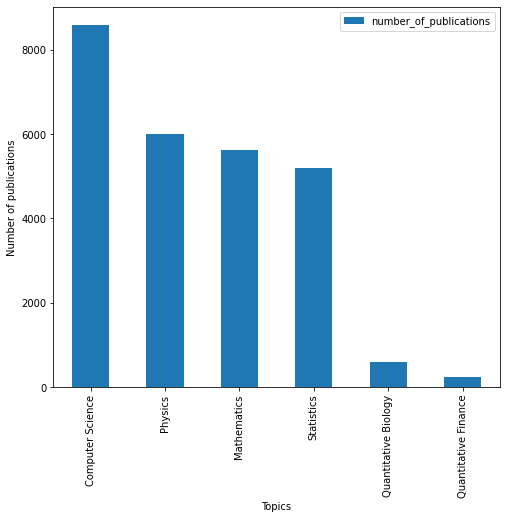

In [31]:
# x축을 topic으로 그에 해당하는 y를 number_of_publications로 정하고 그래프의 형태는 bar
# legend는 범례이고 사이즈는 8,7로 만든다.
# 이름은 각각 Number of publications, Topics로 만든다.

t_stats.plot(x = "topic", y = "number_of_publications", kind = "bar", legend = True, figsize = (8, 7))
plt.ylabel("Number of publications")
plt.xlabel("Topics")

In [26]:
# .sum()에서 axis가 0이면 열을 기준으로 합계를 구해주고 axis가 1이면 행을 기준으로 합계를 구해준다.
# 여기서는 행을 기준으로 합계를 구해야 멀티 라벨을 찾을 수 있으니 axis 1을 적어주면 된다.

num_multilabel = data.sum(axis =1)
print(num_multilabel)

0        1
1        1
2        1
3        1
4        2
        ..
20967    2
20968    1
20969    1
20970    2
20971    2
Length: 20972, dtype: int64


C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17524/1595966583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  num_multilabel = data.sum(axis =1)


In [27]:
# 라벨링이 두개 이상 된거 개수 확인하기
count = 0
for i in num_multilabel.to_list():
    if i > 1:
        count += 1
print("Number of multilabel : ", count)

Number of multilabel :  5044


In [32]:
#데이터프레임에서 요약만 뽑아오기
abstracts = data["ABSTRACT"]

In [33]:
type(abstracts), abstracts.shape

(pandas.core.series.Series, (20972,))

In [35]:
print(abstracts[:10])

0      Predictive models allow subject-specific inf...
1      Rotation invariance and translation invarian...
2      We introduce and develop the notion of spher...
3      The stochastic Landau--Lifshitz--Gilbert (LL...
4      Fourier-transform infra-red (FTIR) spectra o...
5      Let $\Omega \subset \mathbb{R}^n$ be a bound...
6      We observed the newly discovered hyperbolic ...
7      The ability of metallic nanoparticles to sup...
8      We model large-scale ($\approx$2000km) impac...
9      Time varying susceptibility of host at indiv...
Name: ABSTRACT, dtype: object


In [36]:
# 위에 특수 문자들 제거
abstracts = abstracts.str.replace(r"[^A-Za-z]"," ")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17524/2693387634.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  abstracts = abstracts.str.replace(r"[^A-Za-z]"," ")


In [37]:
print(abstracts[:10])

0      Predictive models allow subject specific inf...
1      Rotation invariance and translation invarian...
2      We introduce and develop the notion of spher...
3      The stochastic Landau  Lifshitz  Gilbert  LL...
4      Fourier transform infra red  FTIR  spectra o...
5      Let   Omega  subset  mathbb R  n  be a bound...
6      We observed the newly discovered hyperbolic ...
7      The ability of metallic nanoparticles to sup...
8      We model large scale    approx     km  impac...
9      Time varying susceptibility of host at indiv...
Name: ABSTRACT, dtype: object


In [38]:
#소문자화
abstracts = abstracts.str.lower()

In [39]:
print(abstracts[:10])

0      predictive models allow subject specific inf...
1      rotation invariance and translation invarian...
2      we introduce and develop the notion of spher...
3      the stochastic landau  lifshitz  gilbert  ll...
4      fourier transform infra red  ftir  spectra o...
5      let   omega  subset  mathbb r  n  be a bound...
6      we observed the newly discovered hyperbolic ...
7      the ability of metallic nanoparticles to sup...
8      we model large scale    approx     km  impac...
9      time varying susceptibility of host at indiv...
Name: ABSTRACT, dtype: object


In [40]:
#불용어 처리
from nltk.corpus import stopwords

In [42]:
stop_words = set(stopwords.words("english"))
type(stop_words), print(stop_words)

{'myself', "haven't", 'its', 'mustn', 'own', 'during', 'haven', "wasn't", 'what', 'into', "should've", 'under', 'his', 'so', 'against', 'few', "doesn't", 'my', 'because', 'same', 'didn', 'is', 'between', 'needn', 'had', 'at', 'ours', 'here', "you've", "shouldn't", 'each', 'who', 'but', "she's", 'just', 'the', 'by', 'over', 'most', 'm', 'from', 'shan', "that'll", 'was', 'where', 'did', 'being', 'doing', 'an', 'all', 'we', 'll', "hadn't", 'been', 'it', 'her', 'do', 'no', 'they', 'he', 'those', 'i', 'any', 'their', 'only', 'which', 's', 'them', 'don', 'ma', "you're", 've', 'y', 'than', 'down', 'couldn', 'some', 'aren', 'be', "wouldn't", "couldn't", 'again', "won't", "mightn't", 'above', 'now', 'that', 'will', 'me', "isn't", 'has', 'having', 'in', 'of', 'o', "needn't", 'should', 'very', 'until', 'you', 'does', 'then', 'with', 'through', 'him', 'whom', 'not', "weren't", 'hers', 'ain', 'while', "shan't", 'ourselves', 'for', 'themselves', 'and', 'if', 'both', 'can', 'too', 'about', 'nor', 'wo

(set, None)

In [45]:
# 람다 식을 이용한 불용어 처리
# 띄어쓰기를 기준으로 단어를 나눴으니 " ".join으로 처리한다
abstracts = abstracts.apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words)
)

In [46]:
# 불용어 처리한 abstracts
print(abstracts[:10])

0    predictive models allow subject specific infer...
1    rotation invariance translation invariance gre...
2    introduce develop notion spherical polyharmoni...
3    stochastic landau lifshitz gilbert llg equatio...
4    fourier transform infra red ftir spectra sampl...
5    let omega subset mathbb r n bounded domain sat...
6    observed newly discovered hyperbolic minor pla...
7    ability metallic nanoparticles supply heat liq...
8    model large scale approx km impacts mars like ...
9    time varying susceptibility host individual le...
Name: ABSTRACT, dtype: object


In [47]:
# 단어의 원래 뜻 찾기 stemming(어근)
ps = nltk.PorterStemmer()
abstracts = abstracts.apply(
    lambda x: " ".join(ps.stem(word) for word in x.split())
)


In [48]:
print(abstracts[:10])

0    predict model allow subject specif infer analy...
1    rotat invari translat invari great valu imag r...
2    introduc develop notion spheric polyharmon nat...
3    stochast landau lifshitz gilbert llg equat cou...
4    fourier transform infra red ftir spectra sampl...
5    let omega subset mathbb r n bound domain satis...
6    observ newli discov hyperbol minor planet oumu...
7    abil metal nanoparticl suppli heat liquid envi...
8    model larg scale approx km impact mar like pla...
9    time vari suscept host individu level due wane...
Name: ABSTRACT, dtype: object


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [56]:
X = vectorizer.fit_transform(abstracts)

In [58]:
type(X),X.shape

(scipy.sparse.csr.csr_matrix, (20972, 34201))

In [ ]:
print(vectorizer.get_feature_names())

In [61]:
print(X.toarray()), print(X.toarray().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(20972, 34201)


(None, None)

In [63]:
y= np.array(topics)
print(y)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 ...
 [1 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]]


In [64]:
!pip install imbalanced-learn

You should consider upgrading via the 'd:\git\study\nltk\nltk\scripts\python.exe -m pip install --upgrade pip' command.


In [65]:
# 이부분은 오류가 났으나 해결을 못한 부분임
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [66]:
# 이부분은 오류가 났으나 해결을 못한 부분임
oversample = RandomOverSampler(sampling_strategy= "not majority")

In [68]:
# 이부분은 오류가 났으나 해결을 못한 부분임
X_over,y_over = oversample.fit_resample(X,y)

ValueError: Imbalanced-learn currently supports binary, multiclass and binarized encoded multiclasss targets. Multilabel and multioutput targets are not supported.

In [71]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,y,test_size=0.25,random_state=42)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [73]:
classifier.fit(Train_X,Train_Y)

KNeighborsClassifier()

In [74]:
prediction =  classifier.predict(Test_X)

In [77]:
from sklearn.metrics import accuracy_score
print("KNeighbors Accuracy Score is ", accuracy_score(prediction, Test_Y) * 100)

KNeighbors Accuracy Score is  58.80221247377455


순서 
1. 데이터 준비(read.csv)
2. 데이터 전처리(특수문자 제거->불용어 제거-> 벡터화-> 라벨링)
3. train test값 분리
4. 모델소환
5. 학습시키기(.fit)
6. accuracy_score로 지표 확인하기